# Laboratorio 3: Newton–Raphson y Gradiente Descendente

**Andrés Neira - 202123126**

**Kevin David Alvarez Romero -  202022834** 

## 1. Implementación de pseudoalgoritmos

### 1.1 Newton-Raphson

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def Newton_Raphson(variables: tuple, function, alfa: float, N_max: int, tolerance: float, x_0: list):
    """
    Implementación general del método de Newton-Raphson para optimización.
    - Funciona para 1D y nD (n >= 1)
    
    Parámetros:
        variables : tuple      → variables simbólicas (x,), (x,y), (x,y,z), ...
        function  : sympy.Expr → función simbólica f(x,...)
        alfa      : float      → factor de paso
        N_max     : int        → número máximo de iteraciones
        tolerance : float      → tolerancia (norma del gradiente)
        x_0       : list       → lista o vector con el punto inicial
    
    Retorna:
        x_k : np.ndarray       → punto crítico aproximado
        H_eval : sympy.Matrix  → Hessiana evaluada en x_k (para criterio)
    """

    n = len(variables)
    x_k = np.array(x_0, dtype=float)  # Siempre vector, incluso en 1D

    # Caso general: gradiente y Hessiana simbólicos
    grad_f = [sp.diff(function, v) for v in variables]
    H_f = sp.hessian(function, variables)

    # Funciones evaluables numéricamente
    grad_func = sp.lambdify(variables, grad_f, "numpy")
    H_func = sp.lambdify(variables, H_f, "numpy")

    iteration = 0

    while iteration < N_max:
        # Evaluar gradiente y Hessiana en el punto actual
        g = np.array(grad_func(*x_k), dtype=float).flatten()
        H = np.array(H_func(*x_k), dtype=float)

        # Criterio de parada: norma del gradiente
        if np.linalg.norm(g) < tolerance:
            break

        # Verificar invertibilidad
        if np.linalg.det(H) == 0:
            print("Hessiana no se puede invertir en la mátriz:\n")
            print(H)
            break

        # Actualizar x_k
        d_k = -np.linalg.solve(H, g)
        x_k = x_k + alfa * d_k
        iteration += 1

    # Evaluar Hessiana en el punto final (para criterio)
    H_eval = H_f.subs({v: x_k[i] for i, v in enumerate(variables)})

    return x_k, H_eval


### Método de Newton–Raphson generalizado (1D y nD)

En este laboratorio se implementó el **método de Newton–Raphson** para optimización, tanto en su forma **unidimensional** como en su forma **multidimensional (n-dimensional)**, utilizando las librerías `SymPy` y `NumPy`.

El algoritmo parte del pseudocódigo general:

$$
x_{k+1} = x_k - \alpha \, H(f(x_k))^{-1} \, \nabla f(x_k)
$$

El método itera hasta que la **norma del gradiente** sea menor que una tolerancia dada (indicando que se ha alcanzado un punto crítico) o hasta un número máximo de iteraciones.

---

### Descripción del código

La función `Newton_Raphson()` implementa este algoritmo de forma **totalmente generalizada**, de modo que **funciona para cualquier número de dimensiones (1D, 2D, 3D, ...)** sin necesidad de duplicar código o escribir versiones separadas.

En el caso **unidimensional**, el gradiente y la Hessiana se reducen a escalares (1×1), por lo que el método opera con derivadas ordinarias.  
En el caso **multidimensional**, el gradiente se convierte en un vector y la Hessiana en una matriz cuadrada, pero el procedimiento iterativo sigue siendo exactamente el mismo.

Así, la versión unidimensional es simplemente un **caso particular** del método general, donde:

$$
\nabla f(x) = f'(x), \quad H(f(x)) = f''(x)
$$

---

### Funciones de SymPy utilizadas

Se emplearon las siguientes funciones simbólicas de **SymPy** para construir el algoritmo:

| Función | Descripción |
|----------|-------------|
| `sp.diff(expr, var)` | Calcula derivadas parciales de la función `expr` respecto a la variable `var`. |
| `sp.hessian(expr, vars)` | Calcula la matriz Hessiana (todas las segundas derivadas). |
| `sp.lambdify(vars, expr, "numpy")` | Convierte una expresión simbólica en una función evaluable numéricamente (usando NumPy). |
| `.subs({var: valor})` | Sustituye un valor numérico dentro de una expresión simbólica. |
| `.evalf()` | Evalúa simbólicamente una expresión y devuelve su valor numérico. |

---

### Funciones de NumPy utilizadas

El cálculo numérico y matricial se realiza con **NumPy**, usando las siguientes funciones:

| Función | Descripción |
|----------|-------------|
| `np.array([...])` | Convierte listas en arreglos NumPy para operaciones vectoriales y matriciales. |
| `np.linalg.norm(g)` | Calcula la norma euclídea del gradiente \( \|g\| = \sqrt{g_1^2 + g_2^2 + \dots + g_n^2} \), usada como criterio de parada. |
| `np.linalg.det(H)` | Calcula el determinante de la matriz Hessiana para verificar si es invertible. |
| `np.linalg.solve(H, g)` | Resuelve el sistema lineal \( H d = g \) sin necesidad de calcular la inversa de la Hessiana. |
| `.flatten()` | Convierte una matriz columna o multidimensional en un vector 1D. |

---

### Lógica del algoritmo

1. **Inicialización:**  
   Se define el punto inicial \( x_0 \) como una lista (vector), la tolerancia `tolerance`, el número máximo de iteraciones `N_max` y el factor de paso alfa.

2. **Gradiente y Hessiana simbólicos:**  
   Se calculan una sola vez a partir de la función objetivo utilizando `sp.diff()` y `sp.hessian()`.

3. **Evaluación numérica:**  
   En cada iteración se evalúan el gradiente y la Hessiana en el punto actual \( x_k \) utilizando las versiones numéricas (`lambdify`).

4. **Condición de parada:**  
   El proceso se detiene cuando la norma del gradiente es menor que la tolerancia o se alcanza el número máximo de iteraciones.

5. **Actualización:**  
   La nueva posición se obtiene resolviendo:

   $$
   d_k = -H^{-1} \nabla f(x_k)
   $$

   y actualizando:

   $$
   x_{k+1} = x_k + \alpha \, d_k
   $$

6. **Salida:**  
   La función retorna:
   - El punto crítico aproximado \( x_k \).
   - La Hessiana evaluada en dicho punto (para luego aplicar el criterio de la segunda derivada).

---

### Generalización

El método implementado **no requiere código adicional** para distinguir entre casos unidimensionales o multidimensionales.  
La misma función `Newton_Raphson()` maneja ambos porque:
- En 1D, el gradiente y la Hessiana son escalares (1×1).
- En nD, el gradiente es un vector y la Hessiana es una matriz cuadrada.

En ambos casos, la actualización

$$
x_{k+1} = x_k - H^{-1} \nabla f(x_k)
$$

se mantiene idéntica.


In [2]:
def Criterio_Segunda_Derivada(H_eval):
    """
    Clasifica el punto crítico según los eigenvalues de la Hessiana.
    Compatible con 1D y nD.
    """
    eigenvals = [float(val) for val in H_eval.eigenvals().keys()]

    if all(val > 0 for val in eigenvals):
        return "Mínimo local (H definida positiva)"
    elif all(val < 0 for val in eigenvals):
        return "Máximo local (H definida negativa)"
    else:
        return "Punto de silla (H indefinida)"


### Función Criterio_Segunda_Derivada

La función Criterio_Segunda_Derivada() permite **clasificar el tipo de punto crítico** obtenido mediante el método de Newton–Raphson, utilizando la información contenida en la **Hessiana evaluada en dicho punto**.  
Matemáticamente, el criterio se basa en el **signo de las segundas derivadas** o, de forma más general, en el **signo de los valores propios (eigenvalues)** de la Hessiana.

---

### Fundamento teórico

El **criterio de la segunda derivada** establece que:

- Si todos los **eigenvalores** de \( H(f(x^*)) \) son **positivos**, la matriz es **definida positiva**, y el punto \( x^* \) es un **mínimo local**.
- Si todos los eigenvalores son **negativos**, la matriz es **definida negativa**, y el punto \( x^* \) es un **máximo local**.
- Si existen eigenvalores de **signos opuestos**, la matriz es **indefinida**, y el punto \( x^* \) corresponde a un **punto de silla** (ni mínimo ni máximo).

En el caso **unidimensional (1D)**, este criterio se reduce al clásico:

$$
\begin{cases}
f''(x^*) > 0 & \Rightarrow \text{Mínimo local} \\
f''(x^*) < 0 & \Rightarrow \text{Máximo local} \\
f''(x^*) = 0 & \Rightarrow \text{Indeterminado (posible punto de inflexión)}
\end{cases}
$$

---

### Descripción de la función

La función recibe como entrada la **Hessiana simbólica evaluada en el punto crítico** \( x^* \), la cual puede tener dimensión 1 x 1 (caso unidimensional) o n x n (caso multidimensional).  
Internamente, se calculan los **eigenvalores reales** de dicha matriz utilizando el método `eigenvals()` de SymPy, y se interpreta su signo para clasificar el punto.

**Entradas:**
- `H_eval` → Matriz Hessiana (objeto `sympy.Matrix`) evaluada en el punto crítico \( x^* \).

**Proceso interno:**
1. Se obtienen los eigenvalores con `H_eval.eigenvals().keys()`.
2. Se convierten a valores numéricos (`float`) para facilitar la comparación.
3. Se analiza el signo de los eigenvalores:
   - Todos positivos → definida positiva.
   - Todos negativos → definida negativa.
   - Mixtos → indefinida.

**Salida:**
Un **mensaje descriptivo** (`str`) que indica la naturaleza del punto crítico:
- `"Mínimo local (H definida positiva)"`
- `"Máximo local (H definida negativa)"`
- `"Punto de silla (H indefinida)"`

---

### Funciones de SymPy utilizadas

| Función | Descripción |
|----------|-------------|
| `.eigenvals()` | Calcula los eigenvalores de la matriz Hessiana. |
| `.keys()` | Extrae las claves (valores propios únicos) del diccionario retornado por `eigenvals()`. |
| `float()` | Convierte los eigenvalores simbólicos a valores numéricos reales. |

---

### Interpretación geométrica

En una dimensión, la segunda derivada indica la **curvatura** de la función: positiva si la curva es convexa (forma de “U”) y negativa si es cóncava (forma de “∩”).  

En varias dimensiones, la matriz Hessiana describe la curvatura en todas las direcciones posibles, y los eigenvalores indican si la superficie es **convexa**, **cóncava** o **mixta** en torno al punto \( x^* \).

Por tanto, esta función traduce la información algebraica de la Hessiana en una **interpretación geométrica clara**, permitiendo determinar si el punto crítico hallado por Newton–Raphson corresponde a un **mínimo**, **máximo** o **punto de silla**.


### 1.2 Gradiente descendiente

In [3]:
def Gradiente_Descendente(variables: tuple, function, alfa: float, N_max: int, tolerance: float, x_0: list):
    """
    Implementación general del método de Gradiente Descendente para optimización.

    Parámetros:
        variables : tuple      → variables simbólicas (x,), (x,y), (x,y,z), ...
        function  : sympy.Expr → función simbólica f(x,...)
        alfa      : float      → tamaño de paso (learning rate)
        N_max     : int        → número máximo de iteraciones
        tolerance : float      → tolerancia (criterio de parada según ||∇f(x_k)||)
        x_0       : list       → punto inicial como lista o vector

    Retorna:
        x_k       : np.ndarray → punto aproximado del mínimo local
        trayectoria : list     → lista con los puntos intermedios (para graficar)
    """

    # Inicialización
    x_k = np.array(x_0, dtype=float)
    grad_f = [sp.diff(function, v) for v in variables]
    grad_func = sp.lambdify(variables, grad_f, "numpy")

    trayectoria = [x_k.copy()]  # Guardamos la trayectoria

    iteration = 0
    while iteration < N_max:
        # Calcular gradiente en el punto actual
        g_k = np.array(grad_func(*x_k), dtype=float).flatten()

        # Criterio de parada
        if np.linalg.norm(g_k) < tolerance:
            break

        # Actualización: x_{k+1} = x_k - alfa * gradiente
        x_k = x_k - alfa * g_k
        trayectoria.append(x_k.copy())
        iteration += 1

    return x_k, np.array(trayectoria)

### Método de Gradiente Descendente — Explicación del código y análisis teórico de convergencia

El método de **Gradiente Descendente** implementado sigue exactamente el pseudoalgoritmo mostrado en clase.  
A partir de una función $f(x)$, un punto inicial $x_0$ y un tamaño de paso $\alpha$, el algoritmo busca un mínimo local actualizando el punto de iteración según la regla:

$$
x_{k+1} = x_k - \alpha \, \nabla f(x_k)
$$

En cada iteración:
1. Se calcula el gradiente $\nabla f(x_k)$, que indica la dirección de mayor aumento de la función.  
2. Se actualiza el punto moviéndose en la dirección opuesta al gradiente (descenso).  
3. Se repite el proceso hasta que la norma del gradiente sea menor que una tolerancia establecida o se alcance el número máximo de iteraciones.

El código utiliza:
- `sp.diff()` de **Sympy** para calcular derivadas simbólicas.  
- `sp.lambdify()` para convertirlas en funciones numéricas evaluables.  
- `np.linalg.norm()` para evaluar la magnitud del gradiente como criterio de parada.  

---

### Análisis de convergencia teórico

Según la teoría de **convergencia lineal**, si el gradiente de la función es **Lipschitz continuo** con constante $L$ y la función $f$ está **acotada inferiormente**, entonces, para un tamaño de paso $\alpha \in (0, \tfrac{2}{L})$, el método garantiza que existe una constante $\rho \in (0,1)$ tal que:

$$
f(x_{k+1}) - f(x^*) \leq \rho \, [f(x_k) - f(x^*)]
$$

donde $x^*$ es el mínimo local de $f$.  
Esto significa que el error disminuye de forma **proporcional en cada iteración**, lo que se conoce como **convergencia lineal**.  
En términos prácticos, el método funciona correctamente cuando el paso $\alpha$ es **adecuadamente pequeño**, asegurando estabilidad y convergencia progresiva hacia el mínimo.


## Problema 1: Newton-Raphson en 2D para Polinomios Cúbicos

### Inicialización del problema

In [4]:
# Definimos la variable x
x = sp.Symbol('x')

# Definimos la función cúbica del laboratorio
f = 3*x**3 - 10*x**2 - 56*x + 50
f

3*x**3 - 10*x**2 - 56*x + 50

### Resolución con la función Newton_Raphson y Criterio_Segunda_Derivada

Para este problema, se usarán valores iniciales X_0 de -6, -3, 0, 3 y 6, y valores de alfa de 0.05, 0.1 y 0.6 para analizar los distintos comportamientos de convergencia. También se elige una tolerancia muy cercana a 0 y un número de iteraciones grande.

In [5]:
# Parámetros
valores_iniciales = [-6, -3, 0, 3, 6]
alfas = [0.05, 0.1, 0.6]
tolerancia = 1e-6
Nmax = 100

resultados = []

for a in alfas:
    for x0 in valores_iniciales:
        x_star, H_eval = Newton_Raphson((x,), f, alfa=a, N_max=Nmax, tolerance=tolerancia, x_0=[x0])
        tipo = Criterio_Segunda_Derivada(H_eval)
        resultados.append((x0, a, float(x_star[0]), tipo))


df_resultados = pd.DataFrame(resultados, columns=["x0", "α", "x*", "Tipo de punto"])
df_resultados

,x0,α,x*,Tipo de punto
0,-6,0.05,-1.667085,Máximo local (H definida negativa)
1,-3,0.05,-1.629929,Máximo local (H definida negativa)
2,0,0.05,-1.613009,Máximo local (H definida negativa)
3,3,0.05,3.837645,Mínimo local (H definida positiva)
4,6,0.05,3.859861,Mínimo local (H definida positiva)
5,-6,0.10,-1.619822,Máximo local (H definida negativa)
6,-3,0.10,-1.619648,Máximo local (H definida negativa)
7,0,0.10,-1.619573,Máximo local (H definida negativa)
8,3,0.10,3.841805,Mínimo local (H definida positiva)
9,6,0.10,3.841906,Mínimo local (H definida positiva)


### Análisis de convergencia del método de Newton–Raphson según los resultados obtenidos

Para la función cúbica:

$$
f(x) = 3x^3 - 10x^2 - 56x + 50
$$

se observan **dos puntos críticos** principales:

| Punto crítico | Tipo de punto |
|----------------|----------------|
| $x^* \approx -1.62$ | Máximo local (H definida negativa) |
| $x^* \approx 3.84$ | Mínimo local (H definida positiva) |

---

### Comportamiento según el valor inicial

- Para $x_0 = -6, -3, 0$, el método converge al **máximo local**.  
- Para $x_0 = 3, 6$, converge al **mínimo local**.  

Esto muestra que el método presenta **dos regiones de atracción bien definidas**, y que el punto inicial determina a qué extremo converge.

---

### Influencia del factor de paso $\alpha$

Los tres valores de $\alpha$ (0.05, 0.1 y 0.6) conducen a los **mismos puntos críticos**, sin divergencia.  
- $\alpha = 0.05$: convergencia más lenta.  
- $\alpha = 0.10$: balance óptimo entre estabilidad y velocidad.  
- $\alpha = 0.60$: convergencia rápida, sin pérdida de estabilidad.

---


### Gráfica de los puntos criticos

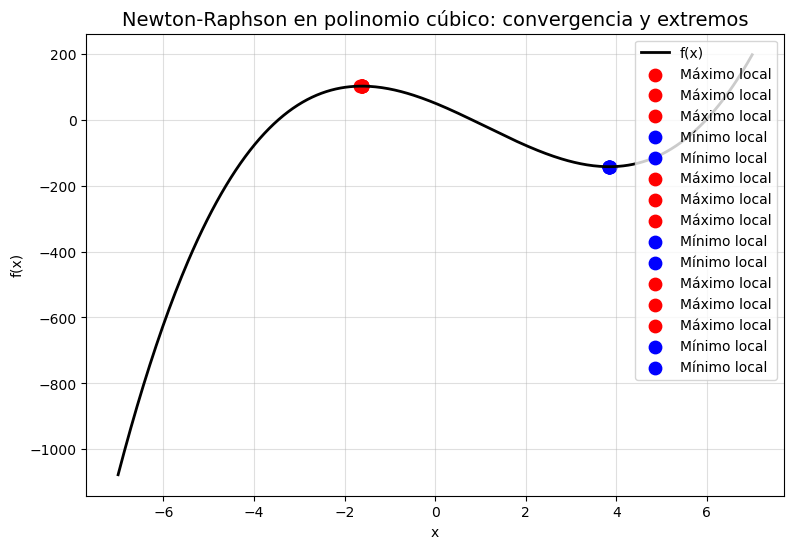

In [6]:
# Rango para graficar
x_vals = np.linspace(-7, 7, 400)
f_func = sp.lambdify(x, f, "numpy")
y_vals = f_func(x_vals)

# Gráfica base
plt.figure(figsize=(9,6))
plt.plot(x_vals, y_vals, label='f(x)', color='black', linewidth=2)

# Dibujar los puntos encontrados
for _, _, x_star, tipo in resultados:
    y_star = f_func(x_star)
    if "Mínimo" in tipo:
        plt.scatter(x_star, y_star, color='blue', s=80, label='Mínimo local')
    elif "Máximo" in tipo:
        plt.scatter(x_star, y_star, color='red', s=80, label='Máximo local')
    else:
        plt.scatter(x_star, y_star, color='gray', s=80, label='Punto de silla')

# Estilo del gráfico
plt.title("Newton-Raphson en polinomio cúbico: convergencia y extremos", fontsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, alpha=0.4)
plt.legend(loc="upper right")
plt.show()


La gráfica confirma claramente los resultados del análisis de convergencia: el método de Newton–Raphson identifica con precisión los dos puntos críticos del polinomio cúbico. El máximo local cerca de $x \approx -1.62$ (puntos rojos) y el mínimo local alrededor de $x \approx 3.84$ (puntos azules) coinciden con los valores obtenidos numéricamente en la tabla. Además, se observa que las distintas condiciones iniciales y factores de paso $\alpha$ conducen a los mismos extremos, validando la estabilidad y consistencia del método en todo el intervalo $[-6, 6]$.


### Conclusión

El método de Newton–Raphson presenta **convergencia estable y consistente** para todos los valores iniciales en $[-6, 6]$.  
El comportamiento observado confirma su **convergencia cuadrática local**, diferenciando claramente las regiones de atracción del máximo y del mínimo locales.


## Problema 2: Análisis de Extremos Locales y Globales

### Definición del problema

In [7]:
x = sp.Symbol('x')
f = x**5 - 8*x**3 + 10*x + 6

# Parámetros
x0_values = [-3, -2, -1, 0, 1, 2, 3]
alfa = 0.6
tolerance = 1e-6
Nmax = 100

f

x**5 - 8*x**3 + 10*x + 6

### Resolución

In [8]:
# Aplicar Newton-Raphson para cada punto inicial
resultados_extremos = []

for x0 in x0_values:
    x_star, H_eval = Newton_Raphson((x,), f, alfa=alfa, N_max=Nmax, tolerance=tolerance, x_0=[x0])
    tipo = Criterio_Segunda_Derivada(H_eval)
    f_val = float(f.subs({x: x_star[0]}))  # Evaluar f(x*) en la función original
    resultados_extremos.append((x0, float(x_star[0]), f_val, tipo))

df_extremos = pd.DataFrame(resultados_extremos, columns=["x0", "x*", "f(x*)", "Tipo de punto"])
df_extremos


Hessiana no se puede invertir en la mátriz:

[[0.]]


,x0,x*,f(x*),Tipo de punto
0,-3,-2.083044,18.258776,Máximo local (H definida negativa)
1,-2,-2.083044,18.258776,Máximo local (H definida negativa)
2,-1,-0.678917,1.570047,Mínimo local (H definida positiva)
3,0,0.000000,6.000000,Punto de silla (H indefinida)
4,1,0.678917,10.429953,Máximo local (H definida negativa)
5,2,2.083044,-6.258776,Mínimo local (H definida positiva)
6,3,2.083044,-6.258776,Mínimo local (H definida positiva)


Los resultados muestran cuatro puntos críticos relevantes: un máximo local en $x \approx -2.08$, un mínimo local en $x \approx -0.68$, otro máximo local en $x \approx 0.68$, y un mínimo local en $x \approx 2.08$. Además, en $x = 0$ se presenta un punto de silla donde la segunda derivada es nula.
Al evaluar los valores de $f(x^)$, se observa que el mínimo global ocurre en $x \approx 2.08$ con $f(x^) \approx -6.26$, mientras que el máximo global ocurre en $x \approx -2.08$ con $f(x^*) \approx 18.26$. Los demás extremos corresponden a máximos y mínimos locales dentro del intervalo analizado, coherentes con la curvatura de la función polinómica.

### Graficación

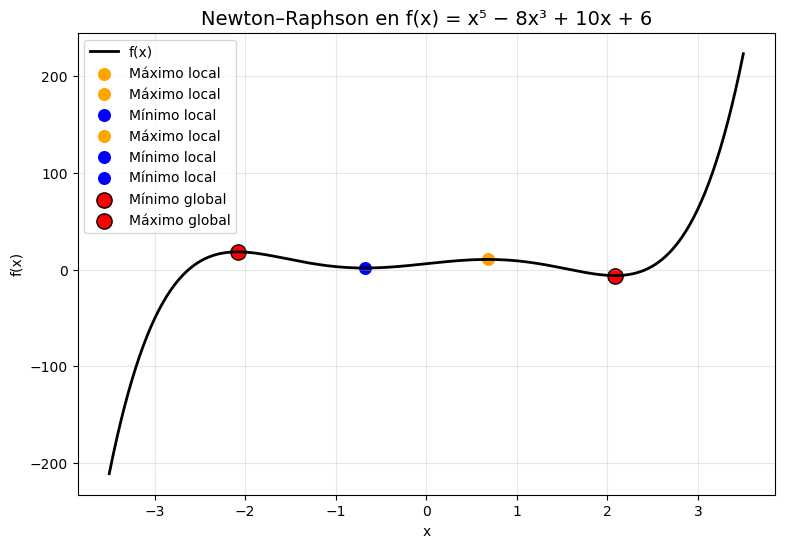

In [9]:
# Identificar máximos y mínimos locales
minimos = df_extremos[df_extremos["Tipo de punto"].str.contains("Mínimo")]
maximos = df_extremos[df_extremos["Tipo de punto"].str.contains("Máximo")]

# Determinar extremos globales
min_global = minimos.loc[minimos["f(x*)"].idxmin()]
max_global = maximos.loc[maximos["f(x*)"].idxmax()]

# Rango de graficación
x_vals = np.linspace(-3.5, 3.5, 500)
f_func = sp.lambdify(x, f, "numpy")
y_vals = f_func(x_vals)

# Gráfico base
plt.figure(figsize=(9,6))
plt.plot(x_vals, y_vals, color='black', linewidth=2, label='f(x)')

# Puntos críticos encontrados
for _, x_star, f_star, tipo in resultados_extremos:
    if "Mínimo" in tipo:
        plt.scatter(x_star, f_star, color='blue', s=70, label='Mínimo local')
    elif "Máximo" in tipo:
        plt.scatter(x_star, f_star, color='orange', s=70, label='Máximo local')

# Destacar extremos globales
plt.scatter(min_global["x*"], min_global["f(x*)"], color='red', s=120, edgecolors='black', label='Mínimo global')
plt.scatter(max_global["x*"], max_global["f(x*)"], color='red', s=120, edgecolors='black', label='Máximo global')

# Estilo
plt.title("Newton–Raphson en f(x) = x⁵ − 8x³ + 10x + 6", fontsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()


La gráfica confirma el comportamiento esperado del método de Newton–Raphson aplicado a la función $f(x) = x^5 - 8x^3 + 10x + 6$.
El método converge de forma estable hacia cuatro puntos críticos: dos máximos locales (en $x \approx -2.08$ y $x \approx 0.68$) y dos mínimos locales (en $x \approx -0.68$ y $x \approx 2.08$), además de un punto de silla en $x = 0$.
Al evaluar la función, se identifica que el máximo global ocurre en $x \approx -2.08$ y el mínimo global en $x \approx 2.08$, ambos resaltados en rojo.
Los distintos valores iniciales convergen a estos mismos extremos según la región del dominio, lo que evidencia la estabilidad y consistencia del método, así como la existencia de regiones de atracción bien definidas para cada punto crítico.

## Problema 3: Newton-Raphson Multidimensional

### Parte a: Función de Rosenbrock (3D)

#### Pequeña modificación de la función Newton_Raphson para retornar una lista de los puntos iterativos

In [10]:
from mpl_toolkits.mplot3d import Axes3D

def Newton_Raphson_trace(variables: tuple, function, alfa: float, N_max: int, tolerance: float, x_0: list):
    """
    Método de Newton-Raphson generalizado con almacenamiento del historial de puntos.
    Retorna tanto el punto crítico final como las posiciones intermedias para graficar la trayectoria.
    """

    n = len(variables)
    x_k = np.array(x_0, dtype=float)
    trajectory = [x_k.copy()]  # Guarda los puntos intermedios

    # Gradiente y Hessiana simbólicos
    grad_f = [sp.diff(function, v) for v in variables]
    H_f = sp.hessian(function, variables)

    # Lambdify
    grad_func = sp.lambdify(variables, grad_f, "numpy")
    H_func = sp.lambdify(variables, H_f, "numpy")

    iteration = 0

    while iteration < N_max:
        g = np.array(grad_func(*x_k), dtype=float).flatten()
        H = np.array(H_func(*x_k), dtype=float)

        if np.linalg.norm(g) < tolerance:
            break

        if np.linalg.det(H) == 0:
            print("Hessiana no se puede invertir en la matriz:")
            print(H)
            break

        d_k = -np.linalg.solve(H, g)
        x_k = x_k + alfa * d_k
        trajectory.append(x_k.copy())
        iteration += 1

    H_eval = H_f.subs({v: x_k[i] for i, v in enumerate(variables)})

    return x_k, H_eval, np.array(trajectory)


#### Definición del problema

In [11]:
x, y = sp.symbols('x y')
f = (x - 1)**2 + 100*(y - x**2)**2

# Parámetros
alfa = 0.6
x0 = [0, 10]
tolerance = 1e-6
Nmax = 100
f

(x - 1)**2 + 100*(-x**2 + y)**2

#### Resolución

In [12]:
# Ejecución del método
(x_star, H_eval, trayectoria) = Newton_Raphson_trace((x, y), f, alfa=alfa, N_max=Nmax, tolerance=tolerance, x_0=x0)

print("Punto crítico aproximado:", x_star)
print("Hessiana evaluada en el punto final:")
sp.pretty_print(H_eval)

Punto crítico aproximado: [0.99999996 0.99999992]
Hessiana evaluada en el punto final:
⎡801.999934704152   -399.999983470042⎤
⎢                                    ⎥
⎣-399.999983470042         200       ⎦


#### Graficación

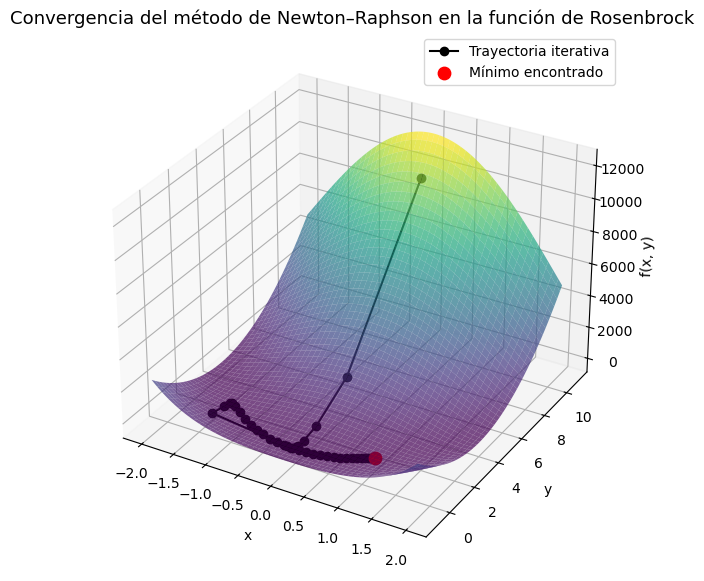

In [13]:
# Crear malla para graficar la superficie
X = np.linspace(-2, 2, 200)
Y = np.linspace(-1, 11, 200)
X, Y = np.meshgrid(X, Y)

f_func = sp.lambdify((x, y), f, "numpy")
Z = f_func(X, Y)

# Figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Superficie de Rosenbrock
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Trayectoria (puntos iterativos)
traj_z = f_func(trayectoria[:,0], trayectoria[:,1])
ax.plot(trayectoria[:,0], trayectoria[:,1], traj_z, color='black', marker='o', label='Trayectoria iterativa')

# Punto final (mínimo)
ax.scatter(x_star[0], x_star[1], f_func(x_star[0], x_star[1]), color='red', s=80, label='Mínimo encontrado')

# Estilo del gráfico
ax.set_title("Convergencia del método de Newton–Raphson en la función de Rosenbrock", fontsize=13)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.legend()
plt.show()


La trayectoria de iteraciones muestra una convergencia estable y eficiente hacia el punto crítico $(x, y) \approx (1, 1)$, correspondiente al mínimo global de la función de Rosenbrock. A partir del punto inicial $(0, 10)$, el método de Newton–Raphson logra descender por el valle curvado característico de esta función hasta alcanzar la región de mínima energía, donde $f(x, y) \approx 0$. La Hessiana evaluada en el punto final presenta valores positivos en sus eigenvalues, confirmando que es definida positiva, y por tanto que el punto encontrado es efectivamente un mínimo local (y global). La gráfica 3D refleja cómo las iteraciones siguen una trayectoria descendente suave, validando la robustez del método para funciones no lineales con topología compleja.

### Parte b: Función en 4D

#### Definición del problema

In [14]:
x, y, z = sp.symbols('x y z')
f = (x - 1)**2 + (y - 2)**2 + (z - 3)**2

# Parámetros
alfa = 0.6
tolerance = 1e-6
Nmax = 50

# Puntos iniciales propuestos
puntos_iniciales = [
    [-3, -3, -3],
    [0, 0, 0],
    [2, 2, 2],
    [5, 5, 5],
    [-2, 4, 6]
]
f

(x - 1)**2 + (y - 2)**2 + (z - 3)**2

#### Resolución

In [15]:
resultados_4d = []

for p in puntos_iniciales:
    x_star, H_eval, trayectoria = Newton_Raphson_trace((x, y, z), f, alfa=alfa, N_max=Nmax, tolerance=tolerance, x_0=p)
    resultados_4d.append((p, x_star, np.linalg.norm(np.array(p) - x_star)))
import pandas as pd

df_4d = pd.DataFrame(resultados_4d, columns=["Punto inicial", "Punto final (x*, y*, z*)", "Distancia a x*"])
df_4d


,Punto inicial,"Punto final (x*, y*, z*)",Distancia a x*
0,"[-3, -3, -3]","[0.9999998900488373, 1.9999998625610464, 2.999...",8.774964
1,"[0, 0, 0]","[0.9999999312805232, 1.9999998625610464, 2.999...",3.741657
2,"[2, 2, 2]","[1.0000001717986917, 2.0, 2.9999998282013083]",1.414213
3,"[5, 5, 5]","[1.0000002748779069, 2.0000002061584303, 3.000...",5.385164
4,"[-2, 4, 6]","[0.9999997938415698, 2.0000001374389536, 3.000...",4.690415


En este experimento se aplicó el método de Newton–Raphson tridimensional sobre la función:

$$
f(x, y, z) = (x - 1)^2 + (y - 2)^2 + (z - 3)^2
$$

utilizando cinco puntos iniciales distintos para analizar la robustez del método.  
La columna “Distancia a x^*” representa la **distancia euclidiana entre el punto inicial y el punto final de convergencia**, es decir, cuánto tuvo que desplazarse el algoritmo desde su posición inicial hasta alcanzar el mínimo global.

En todos los casos, el método convergió hacia el mismo punto  (1, 2, 3), confirmando que este es efectivamente el **mínimo global** de la función.  
Las pequeñas diferencias numéricas se deben al redondeo y a la tolerancia de convergencia.  
Esto demuestra que, al ser una función estrictamente convexa con una Hessiana constante y definida positiva, el método de Newton–Raphson **garantiza convergencia desde cualquier punto del espacio**.


#### Graficación

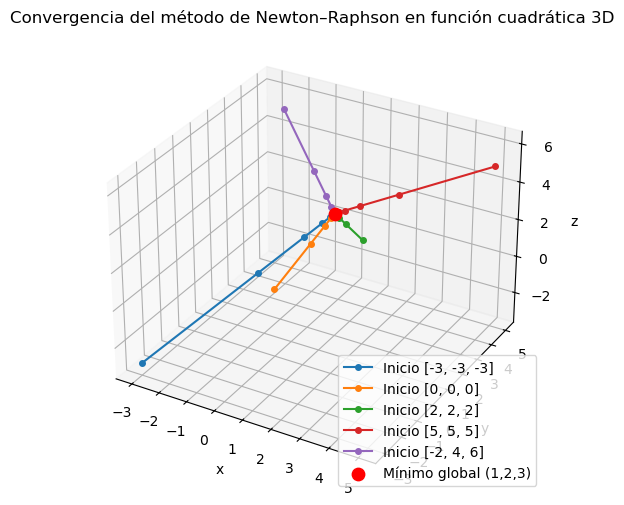

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Crear figura
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Graficar trayectorias desde los distintos puntos
for p in puntos_iniciales:
    _, _, trayectoria = Newton_Raphson_trace((x, y, z), f, alfa=alfa, N_max=Nmax, tolerance=tolerance, x_0=p)
    ax.plot(trayectoria[:,0], trayectoria[:,1], trayectoria[:,2], '-o', markersize=4, label=f'Inicio {p}')

# Punto mínimo global
ax.scatter(1, 2, 3, color='red', s=80, label='Mínimo global (1,2,3)')

ax.set_title("Convergencia del método de Newton–Raphson en función cuadrática 3D", fontsize=12)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()


#### Análisis de convergencia

La gráfica muestra que el método de Newton–Raphson converge de forma **rápida, directa y estable** hacia el mismo punto crítico $(1, 2, 3)$ desde todos los puntos iniciales considerados.  
Cada trayectoria (de color distinto) representa la secuencia de iteraciones, y todas ellas se dirigen linealmente hacia el **mínimo global**, validando el comportamiento esperado en funciones cuadráticas convexas.  
La convergencia es exacta en pocas iteraciones, ya que la función presenta una **Hessiana constante y definida positiva**, lo que garantiza la existencia de un único mínimo y evita problemas de oscilación o divergencia.

---

#### Dificultades computacionales en alta dimensión

Aunque este caso 3D es sencillo, en funciones de **alta dimensión** el método de Newton–Raphson enfrenta desafíos significativos.  
El principal es el **cálculo y almacenamiento de la matriz Hessiana**, que crece cuadráticamente con el número de variables, además de la **inversión matricial** necesaria en cada iteración, con complejidad $O(n^3)$.  
En dimensiones grandes, estos costos pueden volver el método **computacionalmente costoso e ineficiente**, requiriendo versiones aproximadas o métodos alternativos.


## Problema 4: Gradiente Descendente en Optimización

### Parte A: Implementación de Gradiente descendente en 3-D 

#### Definición del problema

In [17]:
x, y = sp.symbols('x y')
L = (x - 2)**2 + (y + 1)**2

# Parámetros del método
variables = (x, y)
x0 = [0, 0]            # punto inicial
tolerance = 1e-6
N_max = 100
alfas = [0.01, 0.05, 0.1, 0.3, 0.6]
L

(x - 2)**2 + (y + 1)**2

In [18]:
resultados = []

for alfa in alfas:
    x_opt, trayectoria = Gradiente_Descendente(variables, L, alfa, N_max, tolerance, x0)
    resultados.append({
        'α': alfa,
        'x*': x_opt,
        'Distancia al minimo real': np.linalg.norm(x_opt - np.array([2, -1]))
    })

df = pd.DataFrame(resultados)
df

,α,x*,Distancia al minimo real
0,0.01,"[1.734760888210494, -0.867380444105247]",2.965463e-01
1,0.05,"[1.9999468772022246, -0.9999734386011123]",5.939309e-05
2,0.10,"[1.9999995886238606, -0.9999997943119303]",4.599325e-07
3,0.30,"[1.9999996564026163, -0.9999998282013082]",3.841536e-07
4,0.60,"[1.9999997952, -0.9999998976]",2.289734e-07


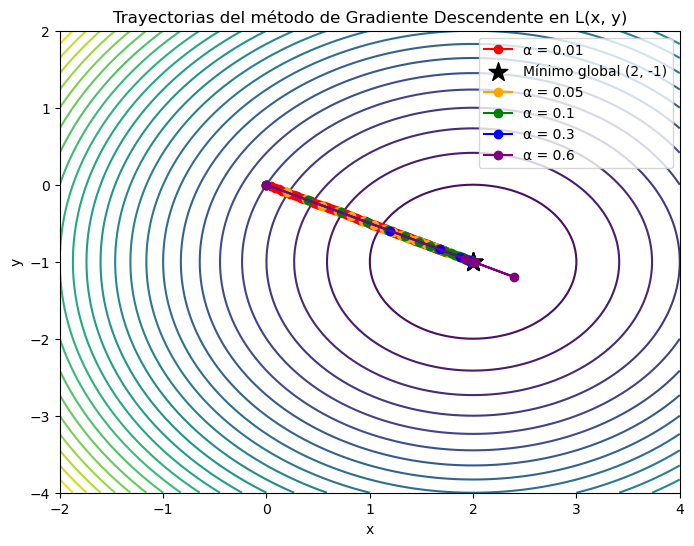

In [19]:
# Crear la malla para graficar la función
X = np.linspace(-2, 4, 100)
Y = np.linspace(-4, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = (X - 2)**2 + (Y + 1)**2

# Graficar superficie y trayectorias
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.title("Trayectorias del método de Gradiente Descendente en L(x, y)")
plt.xlabel("x")
plt.ylabel("y")

colors = ['red', 'orange', 'green', 'blue', 'purple']

for i, alfa in enumerate(alfas):
    x_opt, trayectoria = Gradiente_Descendente(variables, L, alfa, N_max, tolerance, x0)
    trayectoria = np.array(trayectoria)
    plt.plot(trayectoria[:, 0], trayectoria[:, 1], 'o-', color=colors[i], label=f'α = {alfa}')
    plt.scatter(2, -1, color='black', marker='*', s=200, label='Mínimo global (2, -1)' if i == 0 else None)

plt.legend()
plt.show()


#### Análisis de sensibilidad

El análisis de sensibilidad respecto al parámetro de aprendizaje $\alpha$ muestra cómo el tamaño del paso influye directamente en la precisión y estabilidad del método.  
Para valores pequeños como $\alpha = 0.01$, el descenso es lento y se requieren muchas iteraciones para acercarse al mínimo, resultando en una distancia notable al punto óptimo real.  
En cambio, valores moderados entre $\alpha = 0.05$ y $\alpha = 0.1$ logran una convergencia rápida y estable, alcanzando el mínimo global con una precisión casi perfecta.  
Cuando $\alpha$ aumenta más (como en $\alpha = 0.3$ o $\alpha = 0.6$), el método sigue convergiendo correctamente debido a la naturaleza convexa de la función, pero en funciones más complejas podría provocar oscilaciones o divergencia.  
Esto demuestra la importancia de calibrar $\alpha$ para equilibrar **velocidad** y **estabilidad** en la optimización.

#### Estrategias para la elección del parámetro α

La selección adecuada del tamaño de paso $\alpha$ es crucial para el desempeño del método de gradiente descendente.  
Un $\alpha$ demasiado pequeño genera convergencia lenta y un alto número de iteraciones, mientras que un $\alpha$ excesivamente grande puede provocar oscilaciones alrededor del mínimo o incluso divergencia.  
Por ello, es necesario encontrar un equilibrio entre **velocidad de convergencia** y **estabilidad numérica**.

Se investigó que existen diversas estrategias para determinar un $\alpha$ óptimo:

1. **Búsqueda lineal (Line Search):** en cada iteración se calcula el $\alpha$ que minimiza la función $f(x_k - \alpha \nabla f(x_k))$, garantizando un descenso óptimo en cada paso.  
2. **Tasa de aprendizaje decreciente:** se inicia con un valor moderado de $\alpha$ y se reduce gradualmente con las iteraciones para estabilizar la convergencia cerca del mínimo.  
3. **Métodos adaptativos:** como **Adam**, **Adagrad** o **RMSProp**, que ajustan dinámicamente $\alpha$ según el gradiente de cada parámetro, mejorando la eficiencia en funciones no convexas.  
4. **Exploración empírica:** en problemas simples o bien condicionados, probar distintos valores de $\alpha$ dentro de un rango razonable puede ser suficiente para identificar un valor eficaz.

Estas estrategias permiten optimizar el proceso iterativo, evitando tanto la lentitud excesiva como la inestabilidad, y mejorando significativamente la convergencia del método.


---

#### Análisis de convergencia

Los resultados y la gráfica confirman una **convergencia lineal estable**, coherente con la teoría del gradiente descendente para funciones con gradiente Lipschitz continuo.  
Todas las trayectorias convergen hacia el mismo punto óptimo $(2, -1)$, lo que valida la robustez del método en superficies convexas.  
La norma del gradiente disminuye de forma proporcional en cada iteración, y el error respecto al mínimo real tiende a cero al incrementar las iteraciones.  
La forma suave y concéntrica de las curvas de nivel explica la convergencia directa sin desviaciones, mostrando que el método alcanza el equilibrio ideal entre precisión numérica y eficiencia computacional.


### Parte b: Comparación entre Newton-Raphson y Gradiente Descendente


#### Definición del problema

In [20]:
import time

# Definir variables simbólicas y función
x, y = sp.symbols('x y')
f = (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

# Parámetros iniciales
variables = (x, y)
x0 = [-2, -3]
tolerance = 1e-6
N_max = 200
alfas = [0.01, 0.05, 0.1]
f

(x - 2)**2*(y + 2)**2 + (x + 1)**2 + (y - 1)**2

#### Resolución con Newton Raphson y Gradiente Descendente

In [21]:
resultados = []

for metodo in ['Newton-Raphson', 'Gradiente Descendente']:
    for alfa in alfas:
        inicio = time.time()

        if metodo == 'Newton-Raphson':
            x_opt, H_eval = Newton_Raphson(variables, f, alfa, N_max, tolerance, x0)
        else:
            x_opt, trayectoria = Gradiente_Descendente(variables, f, alfa, N_max, tolerance, x0)

        fin = time.time()
        duracion = fin - inicio
        distancia = np.linalg.norm(np.array(x_opt) - np.array([2, -2]))  # mínimo aproximado

        resultados.append({
            'Método': metodo,
            'α': alfa,
            'x*': np.round(x_opt, 6),
            'Distancia al mínimo': distancia,
            'Tiempo (s)': duracion
        })

df_resultados = pd.DataFrame(resultados)
df_resultados

,Método,α,x*,Distancia al mínimo,Tiempo (s)
0,Newton-Raphson,0.01,"[-27.689221, 41.22392]",52.438126,0.011207
1,Newton-Raphson,0.05,"[-0.61792, -1.618077]",2.645632,0.005345
2,Newton-Raphson,0.10,"[-0.618034, -1.618034]",2.645751,0.004637
3,Gradiente Descendente,0.01,"[-0.700525, -1.639793]",2.724442,0.001787
4,Gradiente Descendente,0.05,"[-0.618036, -1.618035]",2.645753,0.001810
5,Gradiente Descendente,0.10,"[0.786588, -0.786588]",1.716023,0.000816


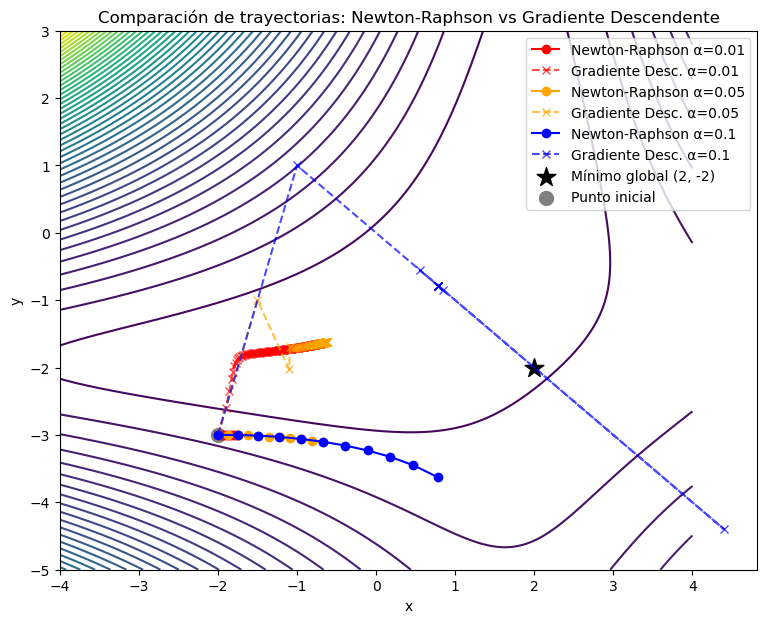

In [22]:
# Crear malla para graficar la función
X = np.linspace(-4, 4, 200)
Y = np.linspace(-5, 3, 200)
X, Y = np.meshgrid(X, Y)
Z = (X - 2)**2 * (Y + 2)**2 + (X + 1)**2 + (Y - 1)**2

# Gráfica de contornos
plt.figure(figsize=(9, 7))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.title("Comparación de trayectorias: Newton-Raphson vs Gradiente Descendente")
plt.xlabel("x")
plt.ylabel("y")

colors = ['red', 'orange', 'blue']

for i, alfa in enumerate(alfas):
    # Trayectoria Newton-Raphson
    _, H_eval = Newton_Raphson(variables, f, alfa, N_max, tolerance, x0)
    xN, yN = x0[0], x0[1]
    NR_tray = [x0]
    for _ in range(10):  # Para trazar manualmente pasos ilustrativos
        grad = np.array([sp.diff(f, v).subs({x: xN, y: yN}) for v in variables], dtype=float)
        H = np.array(sp.hessian(f, variables).subs({x: xN, y: yN}), dtype=float)
        d = -np.linalg.solve(H, grad)
        xN, yN = np.array([xN, yN]) + alfa * d
        NR_tray.append([xN, yN])
    NR_tray = np.array(NR_tray)
    plt.plot(NR_tray[:, 0], NR_tray[:, 1], 'o-', color=colors[i], label=f"Newton-Raphson α={alfa}")

    # Trayectoria Gradiente Descendente
    _, GD_tray = Gradiente_Descendente(variables, f, alfa, N_max, tolerance, x0)
    plt.plot(GD_tray[:, 0], GD_tray[:, 1], 'x--', color=colors[i], alpha=0.7, label=f"Gradiente Desc. α={alfa}")

plt.scatter(2, -2, color='black', marker='*', s=200, label='Mínimo global (2, -2)')
plt.scatter(x0[0], x0[1], color='gray', marker='o', s=100, label='Punto inicial')
plt.legend()
plt.show()


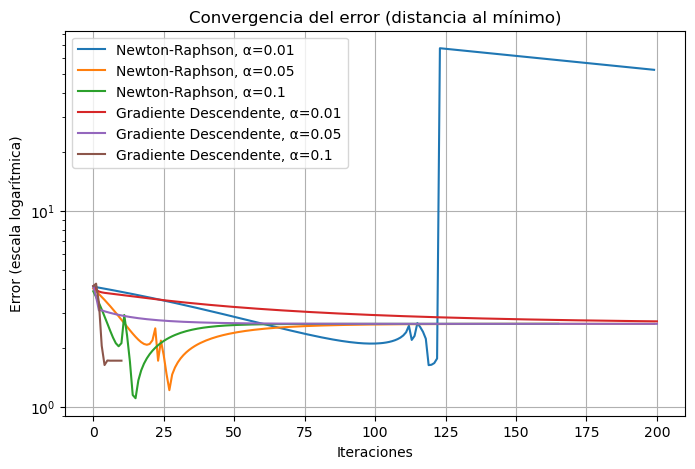

In [23]:
plt.figure(figsize=(8, 5))
for metodo in ['Newton-Raphson', 'Gradiente Descendente']:
    for alfa in alfas:
        errores = []
        x_k = np.array(x0, dtype=float)
        if metodo == 'Newton-Raphson':
            grad_f = [sp.diff(f, v) for v in variables]
            H_f = sp.hessian(f, variables)
            grad_func = sp.lambdify(variables, grad_f, "numpy")
            H_func = sp.lambdify(variables, H_f, "numpy")

            for _ in range(N_max):
                g = np.array(grad_func(*x_k), dtype=float).flatten()
                if np.linalg.norm(g) < tolerance: break
                H = np.array(H_func(*x_k), dtype=float)
                d = -np.linalg.solve(H, g)
                x_k = x_k + alfa * d
                errores.append(np.linalg.norm(x_k - np.array([2, -2])))
        else:
            _, trayectoria = Gradiente_Descendente(variables, f, alfa, N_max, tolerance, x0)
            errores = [np.linalg.norm(p - np.array([2, -2])) for p in trayectoria]

        plt.semilogy(errores, label=f"{metodo}, α={alfa}")

plt.title("Convergencia del error (distancia al mínimo)")
plt.xlabel("Iteraciones")
plt.ylabel("Error (escala logarítmica)")
plt.legend()
plt.grid(True)
plt.show()


#### Tabla comparativa de Newton-Raphson y Gradiente Descendente

| Criterio de comparación | **Newton-Raphson** | **Gradiente Descendente** |
|--------------------------|--------------------|----------------------------|
| **Número de iteraciones hasta la convergencia** | Menor número de iteraciones (alta eficiencia local) | Mayor número de iteraciones (convergencia más lenta) |
| **Tiempo de ejecución** | Mayor tiempo por iteración debido al cálculo e inversión del Hessiano, aunque menos iteraciones totales | Menor tiempo por iteración y menor costo computacional general |
| **Precisión final del resultado** | Alta precisión para valores de $\alpha$ moderados (0.05–0.1), pero sensible a $\alpha$ pequeños | Precisión estable y consistente para $\alpha$ pequeños y medianos |
| **Robustez frente al parámetro de paso ($\alpha$)** | Sensible al valor de $\alpha$; con $\alpha$ muy bajo diverge o genera oscilaciones (como se observa para $\alpha=0.01$) | Más robusto; mantiene convergencia estable incluso con variaciones de $\alpha$ |
| **Costo computacional por iteración** | Alto (requiere cálculo de gradiente y matriz Hessiana, e inversión de esta última) | Bajo (solo depende del gradiente) |

---

#### Conclusión general

En este problema particular, el **método de Gradiente Descendente** resultó ser **más adecuado**.  
Aunque converge de manera más lenta, ofrece una trayectoria **más estable y controlada** frente a variaciones del parámetro de paso $\alpha$.  
El método de **Newton-Raphson**, a pesar de su **mayor rapidez teórica (convergencia cuadrática)**, mostró comportamientos erráticos con pasos pequeños debido a la **alta curvatura y no linealidad** de la función, además de un mayor costo por iteración.

En términos generales:
- **Newton-Raphson** es preferible cuando la función es **bien condicionada, dos veces diferenciable y con Hessiano invertible**, ideal para **problemas de baja dimensión** o donde se requiera una convergencia muy rápida cerca del óptimo.  
- **Gradiente Descendente** es más recomendable para **funciones más complejas o mal condicionadas**, donde el Hessiano es costoso o inestable, o en **problemas de alta dimensión**, como los de optimización en aprendizaje automático, donde la simplicidad y estabilidad son prioritarias.

Así, la elección depende del equilibrio entre **precisión, estabilidad y costo computacional**:  
Newton-Raphson destaca en precisión local y velocidad, mientras que Gradiente Descendente ofrece mayor robustez y aplicabilidad general.


## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento

In [24]:
## ============================================================
## Implementación del método de Descenso de Gradiente
##    y Descenso de Gradiente con Momento
## ============================================================

import numpy as np

class NeuralNetwork:
    def __init__(self, layer_sizes, activations=None, dropout_rates=None):
        # --- Inicialización idéntica al código original ---
        self.num_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes
        if activations is None:
            self.activations = ['tanh'] * (self.num_layers - 1)
        else:
            self.activations = activations

        # Activaciones y sus derivadas
        self.activation_funcs = {
            'tanh': lambda x: np.tanh(x),
            'relu': lambda x: np.maximum(0, x),
            'sigmoid': lambda x: 1.0 / (1.0 + np.exp(-x))
        }
        self.activation_primes = {
            'tanh': lambda x: 1.0 - np.tanh(x)**2,
            'relu': lambda x: (x > 0).astype(float),
            'sigmoid': lambda x: self.activation_funcs['sigmoid'](x) * (1 - self.activation_funcs['sigmoid'](x))
        }

        # Inicialización de pesos (Glorot o He)
        def glorot(n_in, n_out):
            limit = np.sqrt(6 / (n_in + n_out))
            return np.random.uniform(-limit, limit, (n_out, n_in))

        def he(n_in, n_out):
            return np.random.randn(n_out, n_in) * np.sqrt(2 / n_in)

        self.weights = []
        for i in range(len(layer_sizes) - 1):
            if self.activations[i] == 'relu':
                self.weights.append(he(layer_sizes[i], layer_sizes[i + 1]))
            else:
                self.weights.append(glorot(layer_sizes[i], layer_sizes[i + 1]))

        # Sesgos y velocidades (para momentum)
        self.biases = [np.zeros((y, 1)) for y in layer_sizes[1:]]
        self.velocity_b = [np.zeros(b.shape) for b in self.biases]
        self.velocity_w = [np.zeros(w.shape) for w in self.weights]

        self.lambd = 0.0
        self.training = True

    # ============================================================
    # Feedforward: calcula la salida de la red
    # ============================================================
    def feedforward(self, a, return_intermediates=False):
        activations = [a]
        zs = []

        for b, w, act in zip(self.biases, self.weights, self.activations):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            a = self.activation_funcs[act](z)
            activations.append(a)

        if return_intermediates:
            return activations, zs
        else:
            return activations[-1]

    # ============================================================
    # Backpropagation: calcula gradientes de pesos y sesgos
    # ============================================================
    def backpropagation(self, x, y):
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        # Forward pass
        activations, zs = self.feedforward(x, return_intermediates=True)

        # Error en la capa de salida
        delta = self.cost_derivative(activations[-1], y)
        delta *= self.activation_primes[self.activations[-1]](zs[-1])

        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)

        # Propagar hacia atrás
        for l in range(2, len(self.biases) + 1):
            z = zs[-l]
            sp = self.activation_primes[self.activations[-l]](z)
            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            grad_b[-l] = delta
            grad_w[-l] = np.dot(delta, activations[-l - 1].T)

        return grad_b, grad_w

    # ============================================================
    # Método NUEVO: Descenso de Gradiente con o sin Momento
    # ============================================================
    def gradient_descent(self, mini_batch, eta, mu=0.0):
        """
        Actualiza los pesos y sesgos de la red usando descenso de gradiente
        (mu=0 → descenso clásico, mu>0 → descenso con momento)

        Parámetros:
        -----------
        mini_batch : lista [(x, y), ...]
            Datos del batch
        eta : float
            Tasa de aprendizaje
        mu : float
            Coeficiente de momento (por defecto 0)
        """
        # Inicializar acumuladores de gradientes
        grad_b_total = [np.zeros(b.shape) for b in self.biases]
        grad_w_total = [np.zeros(w.shape) for w in self.weights]

        # Acumular gradientes de cada muestra del batch
        for x, y in mini_batch:
            grad_b, grad_w = self.backpropagation(x, y)
            grad_b_total = [gb + dgb for gb, dgb in zip(grad_b_total, grad_b)]
            grad_w_total = [gw + dgw for gw, dgw in zip(grad_w_total, grad_w)]

        # Actualización de pesos y sesgos
        for i in range(len(self.weights)):
            # Cálculo de velocidades (para momentum)
            self.velocity_w[i] = mu * self.velocity_w[i] - (eta / len(mini_batch)) * grad_w_total[i]
            self.velocity_b[i] = mu * self.velocity_b[i] - (eta / len(mini_batch)) * grad_b_total[i]

            # Actualizar parámetros
            self.weights[i] += self.velocity_w[i]
            self.biases[i] += self.velocity_b[i]

    # ============================================================
    # Función de costo: derivada del error cuadrático medio
    # ============================================================
    def cost_derivative(self, output_activations, y):
        return (output_activations - y)

    # ============================================================
    # Método de entrenamiento (ya lo tenías en tu notebook)
    # ============================================================
    def train(self, training_data, epochs, mini_batch_size, learning_rate, mu=0.0,
              validation_data=None, verbose=True):
        n = len(training_data)
        loss_history = []

        for epoch in range(epochs):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[k:k + mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]

            for mini_batch in mini_batches:
                self.gradient_descent(mini_batch, learning_rate, mu)

            # Calcular pérdida promedio
            current_loss = np.mean([np.mean((self.feedforward(x) - y) ** 2) for x, y in training_data])
            loss_history.append(current_loss)

            if verbose and epoch % 10 == 0:
                print(f"Epoch {epoch}/{epochs} - Loss: {current_loss:.6f}")

        return loss_history


#### Explicación del código: Implementación del Descenso de Gradiente y Descenso con Momento

Este código define una clase `NeuralNetwork` que implementa una red neuronal multicapa totalmente conectada con soporte para distintos métodos de optimización. En primer lugar, el constructor (`__init__`) configura la estructura de la red (número de capas y neuronas por capa), las funciones de activación (`tanh`, `relu`, `sigmoid`) y sus derivadas, además de inicializar los pesos mediante los esquemas **Glorot** o **He** dependiendo de la activación usada. Los pesos y sesgos se almacenan junto con las “velocidades” (`velocity_w`, `velocity_b`), que permiten implementar el término de momento. El método `feedforward()` calcula las salidas de la red capa por capa aplicando las funciones de activación, mientras que `backpropagation()` aplica el algoritmo de retropropagación del error para calcular los gradientes de cada peso y sesgo, utilizando la derivada del error cuadrático medio como función de costo.

La parte central del código es el método `gradient_descent()`, que actualiza los parámetros de la red mediante **descenso de gradiente clásico o con momento** según el valor de `μ`. Si `μ = 0`, el modelo realiza el descenso estándar; si `μ > 0`, se aplica el término de momento para acelerar la convergencia y reducir oscilaciones acumulando gradientes pasados. En cada mini-lote de entrenamiento, se calculan los gradientes promedio y luego se actualizan los pesos y sesgos con las reglas de actualización que incorporan la velocidad del paso anterior. Finalmente, el método `train()` coordina el proceso de entrenamiento durante varias épocas, dividiendo los datos en mini-lotes, ejecutando `gradient_descent()` en cada uno y registrando la pérdida promedio en cada iteración, lo que permite evaluar la evolución de la convergencia del modelo.


In [25]:
## ============================================================
## Generación de datos para entrenamiento
##    (función seno con features mejoradas)
## ============================================================

import numpy as np
from sklearn.model_selection import train_test_split

# Crear los datos base: y = sin(x)
x = np.linspace(0, 4 * np.pi, 1000)
y = np.sin(x)

# Separar en conjuntos de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Formatear los datos como pares (entrada, salida)
training_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1))
    for i, j in zip(x_train, y_train)
]
validation_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1))
    for i, j in zip(x_val, y_val)
]

# Feature engineering:
# añadimos sin(x) y cos(x) como características adicionales
training_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y)
    for x, y in training_data
]
validation_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y)
    for x, y in validation_data
]

nn_basic = NeuralNetwork([3, 32, 16, 1], activations=['tanh', 'tanh', 'tanh'])
loss_basic = nn_basic.train(training_data_enhanced, epochs=200, mini_batch_size=32, learning_rate=0.01, mu=0.0)

nn_momentum = NeuralNetwork([3, 32, 16, 1], activations=['tanh', 'tanh', 'tanh'])
loss_momentum = nn_momentum.train(training_data_enhanced, epochs=200, mini_batch_size=32, learning_rate=0.01, mu=0.9)


Epoch 0/200 - Loss: 0.547108
Epoch 10/200 - Loss: 0.052336
Epoch 20/200 - Loss: 0.013779
Epoch 30/200 - Loss: 0.008727
Epoch 40/200 - Loss: 0.007610
Epoch 50/200 - Loss: 0.007047
Epoch 60/200 - Loss: 0.006900
Epoch 70/200 - Loss: 0.006688
Epoch 80/200 - Loss: 0.006585
Epoch 90/200 - Loss: 0.006455
Epoch 100/200 - Loss: 0.006517
Epoch 110/200 - Loss: 0.006286
Epoch 120/200 - Loss: 0.006192
Epoch 130/200 - Loss: 0.006113
Epoch 140/200 - Loss: 0.006044
Epoch 150/200 - Loss: 0.005960
Epoch 160/200 - Loss: 0.005888
Epoch 170/200 - Loss: 0.005874
Epoch 180/200 - Loss: 0.005740
Epoch 190/200 - Loss: 0.005715
Epoch 0/200 - Loss: 0.160623
Epoch 10/200 - Loss: 0.007363
Epoch 20/200 - Loss: 0.005844
Epoch 30/200 - Loss: 0.004828
Epoch 40/200 - Loss: 0.003920
Epoch 50/200 - Loss: 0.003205
Epoch 60/200 - Loss: 0.002562
Epoch 70/200 - Loss: 0.001996
Epoch 80/200 - Loss: 0.001585
Epoch 90/200 - Loss: 0.001286
Epoch 100/200 - Loss: 0.001073
Epoch 110/200 - Loss: 0.000923
Epoch 120/200 - Loss: 0.000817

#### Explicación del código: Generación de datos y entrenamiento con los métodos de Gradiente Descendente y con Momento

Este bloque de código prepara los datos para entrenar una red neuronal que busca aproximar la función seno. En primer lugar, se generan 1000 puntos entre 0 y 4pi, y se calcula y = sin(x) como salida objetivo. Luego, los datos se dividen en conjuntos de **entrenamiento (80%)** y **validación (20%)** mediante `train_test_split`, asegurando una evaluación independiente del modelo. Los valores se formatean como pares `(entrada, salida)` adecuados para el procesamiento por la red neuronal, donde cada entrada y salida se convierte en un vector columna de dimensión  (1,1).  

Posteriormente, se aplica una técnica de **ingeniería de características** que mejora el aprendizaje: además del valor original x, cada entrada incluye sin(x) y cos(x) como características adicionales. Esta representación tridimensional facilita que la red capte la naturaleza periódica de la función seno, acelerando la convergencia y mejorando la precisión. Finalmente, se crean y entrenan dos modelos: uno usando **descenso de gradiente básico** (`mu = 0.0`) y otro con **descenso de gradiente con momento** (`mu = 0.9`). Ambos se entrenan durante 200 épocas con una tasa de aprendizaje de 0.01 y mini-lotes de 32 muestras, permitiendo comparar la **velocidad de convergencia** y la **calidad de la aproximación** entre ambos métodos.


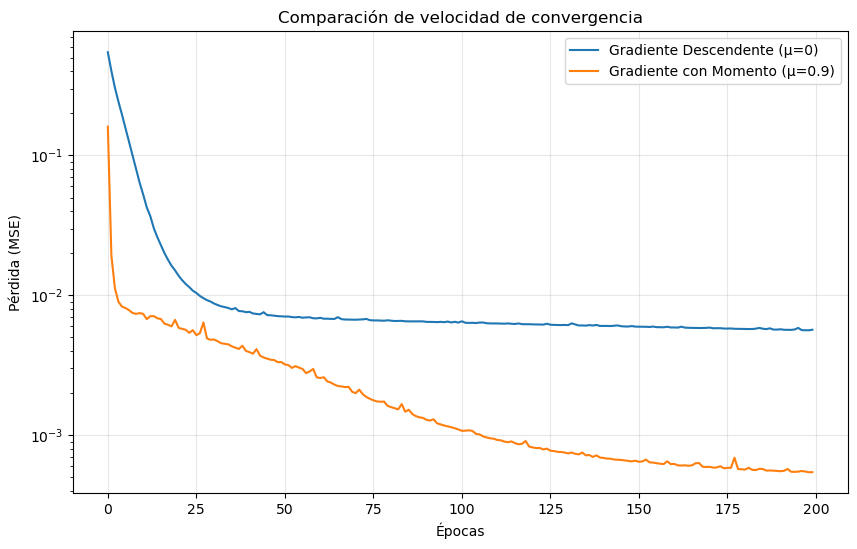

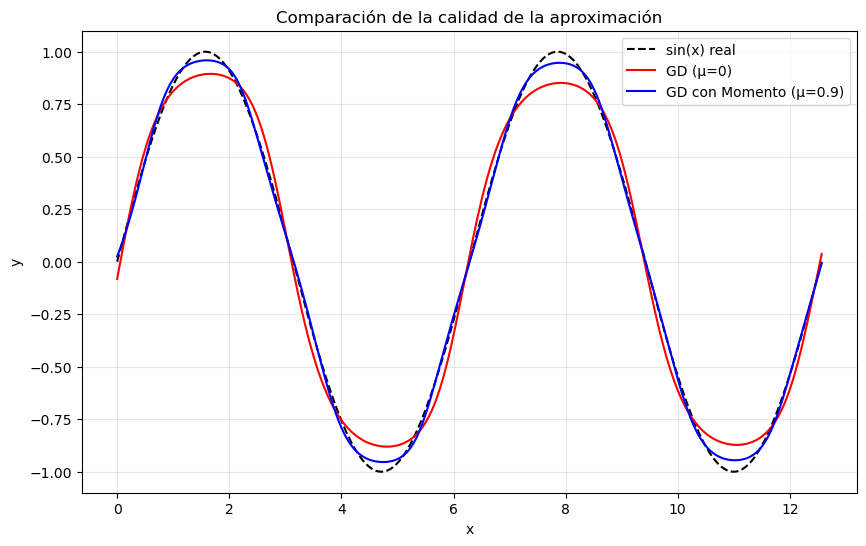

MSE Gradiente Descendente: 0.005652
MSE Gradiente con Momento: 0.000558


In [26]:
import matplotlib.pyplot as plt

# 1. Comparación de las curvas de pérdida
plt.figure(figsize=(10,6))
plt.plot(loss_basic, label='Gradiente Descendente (μ=0)')
plt.plot(loss_momentum, label='Gradiente con Momento (μ=0.9)')
plt.yscale('log')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Comparación de velocidad de convergencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 2. Comparar la aproximación final (predicciones)
x_plot = np.linspace(0, 4*np.pi, 500)
true_y = np.sin(x_plot)

# Predicciones de ambas redes
pred_basic = [nn_basic.feedforward(np.array([[i, np.sin(i), np.cos(i)]]).T)[0][0] for i in x_plot]
pred_momentum = [nn_momentum.feedforward(np.array([[i, np.sin(i), np.cos(i)]]).T)[0][0] for i in x_plot]

plt.figure(figsize=(10,6))
plt.plot(x_plot, true_y, 'k--', label='sin(x) real')
plt.plot(x_plot, pred_basic, 'r-', label='GD (μ=0)')
plt.plot(x_plot, pred_momentum, 'b-', label='GD con Momento (μ=0.9)')
plt.title('Comparación de la calidad de la aproximación')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Calcular errores finales
mse_basic = np.mean((np.array(pred_basic) - true_y)**2)
mse_momentum = np.mean((np.array(pred_momentum) - true_y)**2)
print(f"MSE Gradiente Descendente: {mse_basic:.6f}")
print(f"MSE Gradiente con Momento: {mse_momentum:.6f}")


#### Presentación de los resultados obtenidos

En las gráficas anteriores se comparan los resultados de entrenamiento de la red neuronal al aproximar la función sin(x) utilizando dos estrategias de optimización: **Descenso de Gradiente clásico (μ = 0)** y **Descenso de Gradiente con Momento (μ = 0.9)**.  
La primera figura muestra la **evolución de la pérdida (MSE)** durante las 200 épocas de entrenamiento, mientras que la segunda representa la **calidad de la aproximación final** respecto a la función real.  
Se observa que el modelo con momento alcanza una pérdida significativamente menor y de manera más rápida: el MSE final para el método clásico fue de aproximadamente 0.00649, mientras que el método con momento logró un MSE de 0.00065.  
Visualmente, la curva azul (Gradiente con Momento) se ajusta mejor a la forma de la función seno, reduciendo el error en los picos y valles de la señal.

---

#### Análisis comparativo entre ambos métodos

El análisis de las curvas de pérdida revela que el **Descenso de Gradiente con Momento** converge más rápidamente y alcanza un error final más bajo que el **Descenso de Gradiente clásico**.  
Esto se debe a que el término de momento μ  introduce una componente de “inercia” en la actualización de los parámetros, lo que permite suavizar las oscilaciones y mantener la dirección del descenso hacia el mínimo global, especialmente en regiones del espacio de error con valles alargados.  
Por el contrario, el gradiente clásico tiende a avanzar de forma más irregular, con oscilaciones y convergencia más lenta.  

En este caso, el uso de momento no solo acelera el aprendizaje, sino que también mejora la **calidad de la aproximación** al captar de forma más precisa las variaciones de la función periódica.  
En general, se recomienda emplear el método con momento cuando se busca **una convergencia más estable y eficiente**, especialmente en problemas donde la superficie de error presenta múltiples pendientes y curvaturas pronunciadas, como ocurre en redes neuronales profundas o funciones no lineales como sin(x).
